# Butterfly Image Classifier

By Alexia Rangel Krashenitsa <br>
Referencing these sources directly:
*   https://youtu.be/jztwpsIzEGc?si=q6WQdeSIJ3_AtLl4
*   https://www.tensorflow.org/tutorials/images/classification#compile_and_train_the_model



---

## Dependencies and Setup

In [1]:
#Mounting the google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import tensorflow as tf #Tensorflow is a machine learning dataset used for building Neural Nets
import os #Used to navigate through file structures

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth (So tf doesn't use all the memory)
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    #limit the memory growth for each gpu
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
#all the available gpus
tf.config.list_physical_devices('GPU')

[]

## Filter images

In [5]:
import cv2
import imghdr

In [6]:
%cd /content/drive/MyDrive/Colab_Notebooks/data_folder/butterfly-dataset/
%ldir

/content/drive/MyDrive/Colab_Notebooks/data_folder/butterfly-dataset
drwx------ 2 root    4096 Oct 14 20:44 logs/
drwx------ 2 root    4096 Oct 15 16:29 models/
drwx------ 2 root    4096 Oct 15 16:39 More Butterflies/
drwx------ 2 root    4096 Oct 14 18:32 older butterflies/
drwx------ 2 root    4096 Oct 14 18:21 test_florida_butterflies/
drwx------ 2 root    4096 Oct 14 18:21 train_florida_butterflies/
drwx------ 2 root    4096 Oct 14 18:22 valid_florida_butterflies/


In [7]:
train_dir = 'train_florida_butterflies'
test_dir = 'test_florida_butterflies'
valid_dir = 'valid_florida_butterflies'

In [12]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [13]:
def filterImages(data_dir):
  for image_class in os.listdir(data_dir):
  #For each folder in the inputted directory,
      for image in os.listdir(os.path.join(data_dir, image_class)):
      #go through each image and check the file path and remove if the image doesn't fit the bill
          image_path = os.path.join(data_dir, image_class, image)
          try:
              img = cv2.imread(image_path)
              tip = imghdr.what(image_path)
              if tip not in image_exts:
                  print('Image not in ext list {}'.format(image_path))
                  os.remove(image_path)
          except Exception as e:
              print('Issue with image {}'.format(image_path))
              # os.remove(image_path)

In [14]:
filterImages(train_dir)
filterImages(test_dir)
filterImages(valid_dir)

## Load Data

In [8]:
import numpy as np #For making arrays
from matplotlib import pyplot as plt #Used for plotting data

In [9]:
#Where we load our data. It actually does a lot of preprocessing for us too. We're setting the image size exactly though
train_data = tf.keras.utils.image_dataset_from_directory(train_dir, image_size=(224, 224))
test_data = tf.keras.utils.image_dataset_from_directory(test_dir, image_size=(224, 224))
valid_data = tf.keras.utils.image_dataset_from_directory(valid_dir, image_size=(224, 224))

Found 4522 files belonging to 37 classes.
Found 185 files belonging to 37 classes.
Found 185 files belonging to 37 classes.


In this case, we can't just do data[0] cause this isn't an pre-loaded into memory dataset. It's actually a generator. If we wanted to grab information from each picture, we'd need to use a numpy array, and iterate the array using a numpy iterator.
<br><br>
**data = tf.keras.utils.image_dataset_from_directory('garbage_classification')** -> building our data pipeline
<br><br>
**data_iterator = data.as_numpy_iterator()** -> allowing us to access our data pipeline (allows us to loop through it)
<br><br>
**batch = data_iterator.next()** -> actually accessing the data pipeline (actually grabbing one batch)

In [17]:
trainData_iterator = train_data.as_numpy_iterator()
testData_iterator = test_data.as_numpy_iterator()
validData_iterator = valid_data.as_numpy_iterator()

In [18]:
#Train batch iterate next
train_batch = trainData_iterator.next()

In [19]:
#Test batch iterate next
test_batch = testData_iterator.next()

In [20]:
#Valid batch iterate next
valid_batch = validData_iterator.next()

In [21]:
#length is always 2: one for images, another for label
len(train_batch)

2

In [22]:
#one batch of data.
train_batch

(array([[[[ 94.,  94.,  40.],
          [ 93.,  93.,  39.],
          [ 94.,  93.,  39.],
          ...,
          [164., 129., 151.],
          [213., 166., 198.],
          [233., 181., 219.]],
 
         [[ 94.,  94.,  40.],
          [ 93.,  93.,  39.],
          [ 94.,  93.,  39.],
          ...,
          [135., 100., 120.],
          [198., 153., 184.],
          [221., 174., 208.]],
 
         [[ 94.,  94.,  40.],
          [ 93.,  93.,  39.],
          [ 94.,  93.,  37.],
          ...,
          [ 98.,  63.,  83.],
          [170., 130., 156.],
          [209., 169., 196.]],
 
         ...,
 
         [[ 91.,  95.,  44.],
          [ 92.,  96.,  46.],
          [ 94.,  97.,  52.],
          ...,
          [ 67.,  62.,  24.],
          [ 67.,  62.,  24.],
          [ 68.,  64.,  26.]],
 
         [[ 91.,  95.,  45.],
          [ 91.,  94.,  47.],
          [ 94.,  97.,  54.],
          ...,
          [ 67.,  62.,  20.],
          [ 69.,  64.,  22.],
          [ 73.,  68.,  26.

batch[0] = images <br>
batch[1] = labels

In [23]:
#shape should be consistent thanks to 'tf.keras.utils.image_dataset_from_directory' preprocessing
#Each image is represented as numpy arrays
train_batch[0].shape

(32, 224, 224, 3)

In [24]:
train_batch[1]

array([ 7, 23,  7,  2, 26, 17, 22, 18, 11, 36, 27, 11, 15, 32,  7,  9, 29,
       13, 17, 23, 28, 27, 31, 12, 15,  8, 29,  5,  2, 24, 23,  1],
      dtype=int32)

In [13]:
#Displaying each image in the first batch and their label number
def displayImageWithLabel(batch):
  fig, ax = plt.subplots(ncols=8, figsize=(20,20))
  for idx, img in enumerate(batch[0][:8]):
      ax[idx].imshow(img.astype(int))
      select = batch[1][idx]
      #ax[idx].title.set_text(batch[1][idx])
      print(select)
      print(imageLabels.iloc[select, 0])
      ax[idx].title.set_text(imageLabels.iloc[select, 0])

In [10]:
#For accurate labels
import pandas as pd #Used to manipluate CSV files efficiently
imageLabels = pd.read_csv('ButterflyId.csv') #Read the CSV file into the variable df (DataFile)
imageLabels.head(5)

,Butterflies
0,ATALA
1,ATLAS MOTH
2,BANDED ORANGE HELICONIAN
3,BANDED PEACOCK
4,BANDED TIGER MOTH


7
CLOUDED SULPHUR
23
RED CRACKER
7
CLOUDED SULPHUR
2
BANDED ORANGE HELICONIAN
26
ROSY MAPLE MOTH
17
MILBERTS TORTOISESHELL
22
RED ADMIRAL
18
MONARCH


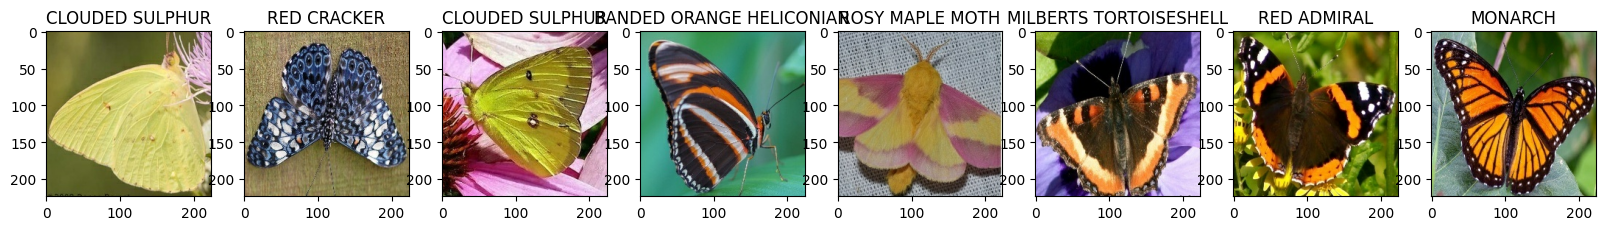

In [27]:
displayImageWithLabel(train_batch)

30
TWO BARRED FLASHER
23
RED CRACKER
0
ATALA
9
CRIMSON PATCH
16
MANGROVE SKIPPER
35
YELLOW SWALLOW TAIL
5
BLUE MORPHO
30
TWO BARRED FLASHER


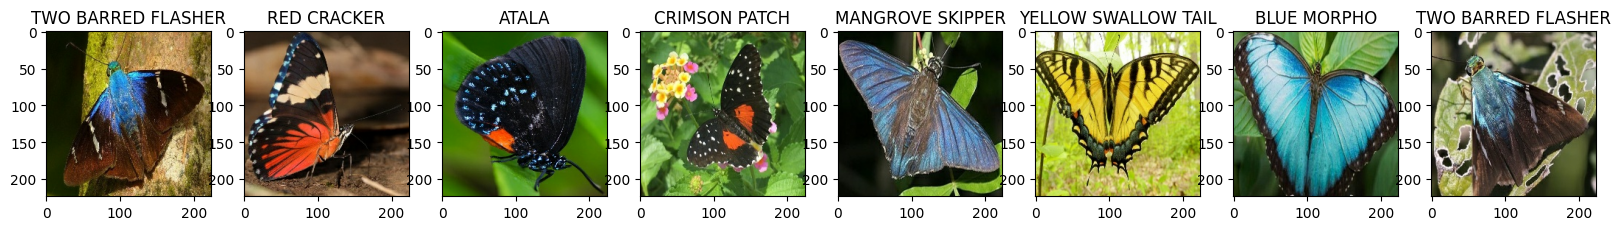

In [28]:
displayImageWithLabel(test_batch)

13
JULIA
24
RED POSTMAN
10
GIANT LEOPARD MOTH
19
PIPEVINE SWALLOW
0
ATALA
12
IO MOTH
30
TWO BARRED FLASHER
9
CRIMSON PATCH


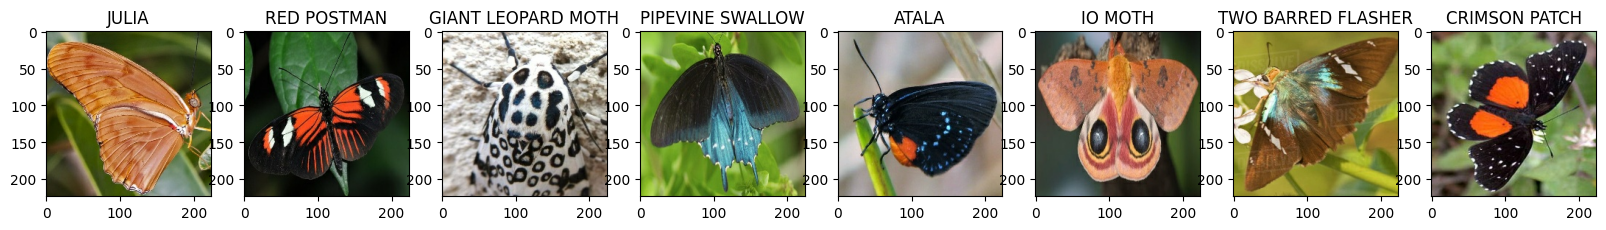

In [29]:
displayImageWithLabel(valid_batch)

**Label Distribution:** <br>

ATALA - 0<br>
ATLAS MOTH - 1<br>
BANDED ORANGE HELICONIAN - 2<br>
BANDED PEACOCK - 3<br>
BANDED TIGER MOTH - 4<br>
BLUE MORPHO - 5<br>
CAIRNS BIRDWING - 6<br>
CLOUDED SULPHUR - 7<br>
CRAMERS 88 - 8<br>
CRIMSON PATCH - 9<br>
GIANT LEOPARD MOTH - 10<br>
GREAT EGGFLY - 11<br>
IO MOTH - 12<br>
JULIA - 13<br>
LUNA MOTH - 14<br>
MALACHITE - 15<br>
MANGROVE SKIPPER - 16<br>
MILBERTS TORTOISESHELL - 17<br>
MONARCH - 18<br>
PIPEVINE SWALLOW - 19<br>
POLYPHEMUS MOTH - 20<br>
QUESTION MARK - 21<br>
RED ADMIRAL - 22<br>
RED CRACKER - 23<br>
RED POSTMAN - 24<br>
RED SPOTTED PURPLE - 25<br>
ROSY MAPLE MOTH - 26<br>
SILVER SPOT SKIPPER - 27<br>
SLEEPY ORANGE - 28<br>
SOUTHERN DOGFACE - 29<br>
TWO BARRED FLASHER - 30<br>
VICEROY - 31<br>
WHITE LINED SPHINX MOTH - 32<br>
WOOD NYMPH - 33<br>
WOOD SATYR - 34<br>
YELLOW SWALLOW TAIL - 35<br>
ZEBRA LONG WING - 36<br>

---

## Pre-processing
###  > Scale Data



In [11]:
#Scaling it to 255
train_data = train_data.map(lambda x,y: (x/255, y))
test_data = test_data.map(lambda x,y: (x/255, y))
valid_data = valid_data.map(lambda x,y: (x/255, y))

In [31]:
train_data.as_numpy_iterator().next()

(array([[[[0.7921569 , 0.99215686, 0.3372549 ],
          [0.8       , 1.        , 0.3529412 ],
          [0.8156863 , 1.        , 0.36862746],
          ...,
          [0.        , 0.10980392, 0.        ],
          [0.        , 0.11372549, 0.        ],
          [0.        , 0.10980392, 0.        ]],
 
         [[0.7921569 , 0.99215686, 0.3372549 ],
          [0.79607844, 0.99607843, 0.34117648],
          [0.8117647 , 1.        , 0.3647059 ],
          ...,
          [0.        , 0.10980392, 0.        ],
          [0.        , 0.11372549, 0.        ],
          [0.        , 0.10980392, 0.        ]],
 
         [[0.7882353 , 0.99215686, 0.3254902 ],
          [0.7921569 , 0.99607843, 0.32941177],
          [0.8       , 1.        , 0.34509805],
          ...,
          [0.00392157, 0.10588235, 0.        ],
          [0.01176471, 0.11372549, 0.        ],
          [0.00784314, 0.11372549, 0.        ]],
 
         ...,
 
         [[0.41568628, 0.53333336, 0.18039216],
          [0.40784

### > Split Data
Our data is already split between train, test, and validation



---
## Readying the Model
Sequential model - Model that works best with 1 input 1 output <br>
[Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) - 2D convolution layer <br>
[MaxPooling2D](https:https://www.tensorflow.org/api_docs/python/tf/compat/v1/layers/MaxPooling2D) - Max pooling layer for 2D inputs (e.g. images), *Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size ) for each channel of the input. The window is shifted by strides along each dimension.* Like a condensing layer. It goes through the images and condenses them down. EX: Instead of returning all of the data from that region, it only returns max. <br>
[Flatten](https://https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) - Helps us go from convolutional layer to a format that Dense will be able to take<br>

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [13]:
model = Sequential()

In [130]:
#Adding a conv layer and a max pooling layer. Notice the input_shape for the first layer is our image size
#Our conv layer will have 16 filters, 3 pixels x 3 pixels in size, and a stride of 1 (moves 1 pixel each time)
#Activation layer is just 'you're taking the result from the conv layer, and passing it through a function that looks like a 'relu' (specifically, anything below 0 will now be 0)
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(224,224,3)))
#Finds the max value and returns it
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

#Dense layers are what bring the data to one final stopping point
#224 neurons, then 1 neuron HAS to be the last one (for a single output)
model.add(Dense(224, activation='relu'))

#If we were doing just 2 output options, we'd do this:
#Sigmoid activation converts end result to something between 0 and 1 (to represent the different outputs)
#model.add(Dense(1, activation='sigmoid'))

#But we're doing more than 2 output options, instead do this
num_classes = len(imageLabels.index)
model.add(Dense(num_classes))

In [131]:
#Optimizer is 'adam', there's a lot of different options
#Losses is set to SparseCategoricalCrossentropy, for more than 2 classification options
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [132]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 26, 26, 16)       

## Training the Data

In [14]:
logdir='logs'

In [15]:
#For logging, or saving a place, etc.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [136]:
#epochs is how long we'll train for
#validation data is after we trained the data, we'll run an evaluation on our validation data to see how well it's actually performing
#callbacks is for logging
hist = model.fit(train_data, epochs=20, validation_data=valid_data, callbacks=[tensorboard_callback])

Epoch 1/20
142/142 [==============================] - 197s 1s/step - loss: 2.5716 - accuracy: 0.2954 - val_loss: 1.5934 - val_accuracy: 0.5676
Epoch 2/20
142/142 [==============================] - 197s 1s/step - loss: 1.1026 - accuracy: 0.6754 - val_loss: 1.2517 - val_accuracy: 0.6865
Epoch 3/20
142/142 [==============================] - 199s 1s/step - loss: 0.4945 - accuracy: 0.8439 - val_loss: 1.2259 - val_accuracy: 0.6865
Epoch 4/20
142/142 [==============================] - 198s 1s/step - loss: 0.1817 - accuracy: 0.9449 - val_loss: 1.6163 - val_accuracy: 0.6324
Epoch 5/20
142/142 [==============================] - 199s 1s/step - loss: 0.1036 - accuracy: 0.9737 - val_loss: 2.3084 - val_accuracy: 0.6270
Epoch 6/20
142/142 [==============================] - 198s 1s/step - loss: 0.0668 - accuracy: 0.9794 - val_loss: 1.6280 - val_accuracy: 0.6757
Epoch 7/20
142/142 [==============================] - 198s 1s/step - loss: 0.0541 - accuracy: 0.9865 - val_loss: 2.0115 - val_accuracy: 0.6324

##Visualizations & Evaluations

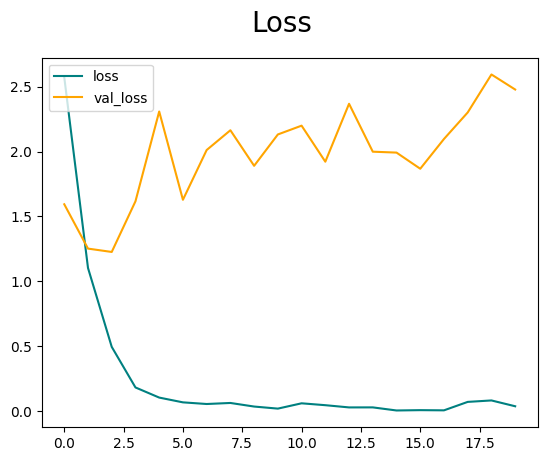

In [137]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

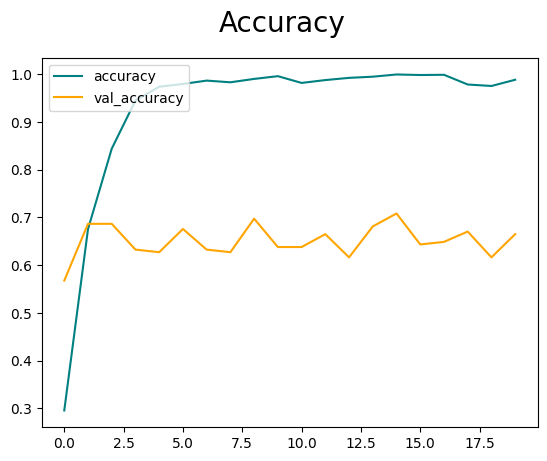

In [138]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

The model is overfitting (not enough training data to have accurate results). We'll do data augmentation to fix this. <br>

## Training the Data part.2

In [64]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [34]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(224,224,3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
  ]
)

In [35]:
model = Sequential()
num_classes = len(imageLabels.index)

In [36]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, (3,3), 1, activation='relu', input_shape=(224,224,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3,3), 1, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, (3,3), 1, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(224, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [37]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                 

In [42]:
#RETRAINING
hist = model.fit(train_data, epochs=20, validation_data=valid_data, callbacks=[tensorboard_callback])

Epoch 1/20
142/142 [==============================] - 244s 2s/step - loss: 3.6110 - accuracy: 0.0276 - val_loss: 3.6112 - val_accuracy: 0.0270
Epoch 2/20
142/142 [==============================] - 255s 2s/step - loss: 3.6092 - accuracy: 0.0330 - val_loss: 3.6121 - val_accuracy: 0.0270
Epoch 3/20
142/142 [==============================] - 235s 2s/step - loss: 3.6080 - accuracy: 0.0336 - val_loss: 3.6134 - val_accuracy: 0.0270
Epoch 4/20
142/142 [==============================] - 242s 2s/step - loss: 3.6075 - accuracy: 0.0336 - val_loss: 3.6144 - val_accuracy: 0.0270
Epoch 5/20
142/142 [==============================] - 229s 2s/step - loss: 3.6073 - accuracy: 0.0336 - val_loss: 3.6145 - val_accuracy: 0.0270
Epoch 6/20
142/142 [==============================] - 228s 2s/step - loss: 3.6073 - accuracy: 0.0336 - val_loss: 3.6149 - val_accuracy: 0.0270
Epoch 7/20
142/142 [==============================] - 238s 2s/step - loss: 3.6071 - accuracy: 0.0336 - val_loss: 3.6149 - val_accuracy: 0.0270

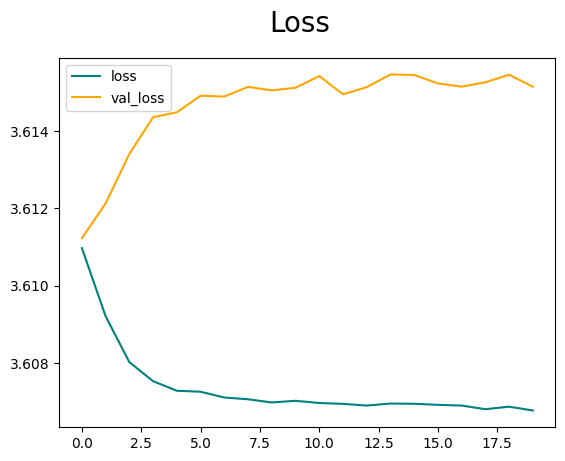

In [43]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

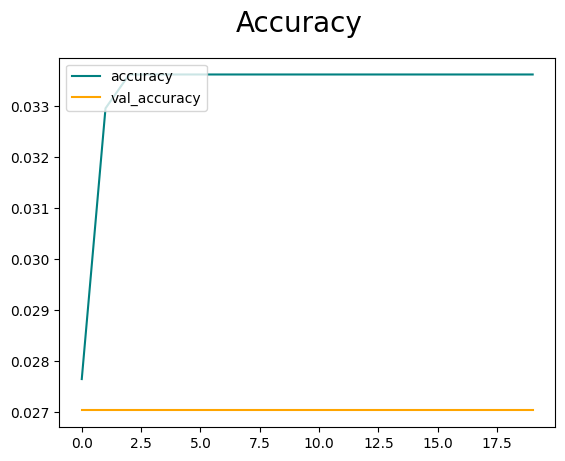

In [44]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Training the Data part.3

In [64]:
num_classes = len(imageLabels.index)

In [86]:
# Creating data augmentation layer
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(224,224,3)),
    layers.RandomRotation(0.2),
  ], name="data_augmentation_layer"
)

In [100]:
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, (3,3), 1, activation='relu', input_shape=(224,224,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3,3), 1, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, (3,3), 1, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(224, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [101]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation_layer (S  (None, 224, 224, 3)       0         
 equential)                                                      
                                                                 
 conv2d_40 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 111, 111, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 54, 54, 32)        0         
 ng2D)                                                           
                                                     

In [102]:
hist = model.fit(train_data, epochs=20, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data), callbacks=[tensorboard_callback])

Epoch 1/20
142/142 [==============================] - 220s 2s/step - loss: 2.9582 - accuracy: 0.1824 - val_loss: 2.3305 - val_accuracy: 0.3514
Epoch 2/20
142/142 [==============================] - 221s 2s/step - loss: 1.7425 - accuracy: 0.4823 - val_loss: 2.0173 - val_accuracy: 0.4162
Epoch 3/20
142/142 [==============================] - 220s 2s/step - loss: 1.2814 - accuracy: 0.6154 - val_loss: 1.3949 - val_accuracy: 0.5838
Epoch 4/20
142/142 [==============================] - 220s 2s/step - loss: 1.1061 - accuracy: 0.6621 - val_loss: 1.1204 - val_accuracy: 0.7081
Epoch 5/20
142/142 [==============================] - 219s 2s/step - loss: 0.9772 - accuracy: 0.6920 - val_loss: 1.1076 - val_accuracy: 0.6703
Epoch 6/20
142/142 [==============================] - 218s 2s/step - loss: 0.8645 - accuracy: 0.7260 - val_loss: 1.1427 - val_accuracy: 0.6811
Epoch 7/20
142/142 [==============================] - 221s 2s/step - loss: 0.7561 - accuracy: 0.7579 - val_loss: 1.0529 - val_accuracy: 0.7081

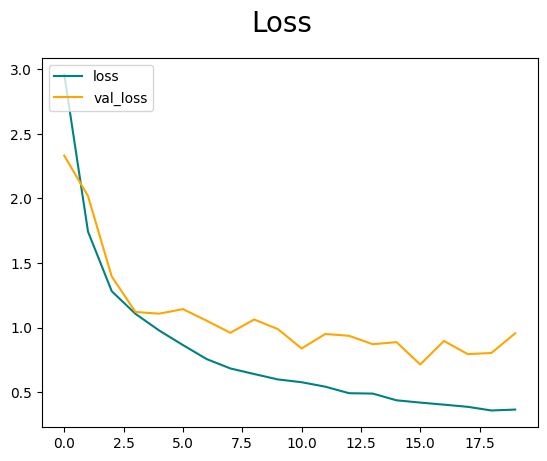

In [103]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

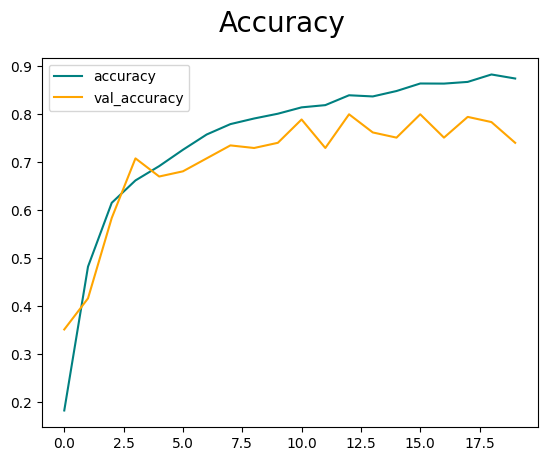

In [104]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Training the Data part.4

In [65]:
num_classes = len(imageLabels.index)

In [66]:
# Creating data augmentation layer
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(224,224,3)),
    layers.RandomRotation(0.2),
  ], name="data_augmentation_layer"
)

In [67]:
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, (3,3), 1, activation='relu', input_shape=(224,224,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3,3), 1, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(224, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
hist = model.fit(train_data, epochs=12, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data), callbacks=[tensorboard_callback])

Epoch 1/12
142/142 [==============================] - 269s 2s/step - loss: 2.8142 - accuracy: 0.2313 - val_loss: 1.9820 - val_accuracy: 0.4811
Epoch 2/12
142/142 [==============================] - 255s 2s/step - loss: 1.6218 - accuracy: 0.5245 - val_loss: 1.4762 - val_accuracy: 0.5622
Epoch 3/12
142/142 [==============================] - 278s 2s/step - loss: 1.2601 - accuracy: 0.6214 - val_loss: 1.2366 - val_accuracy: 0.6649
Epoch 4/12
142/142 [==============================] - 272s 2s/step - loss: 1.0488 - accuracy: 0.6751 - val_loss: 1.1707 - val_accuracy: 0.6595
Epoch 5/12
142/142 [==============================] - 269s 2s/step - loss: 0.9112 - accuracy: 0.7161 - val_loss: 1.1171 - val_accuracy: 0.6811
Epoch 6/12
142/142 [==============================] - 267s 2s/step - loss: 0.8216 - accuracy: 0.7408 - val_loss: 1.0565 - val_accuracy: 0.7243
Epoch 7/12
142/142 [==============================] - 263s 2s/step - loss: 0.7744 - accuracy: 0.7556 - val_loss: 1.1980 - val_accuracy: 0.6703

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-68-f779aa90a00a>", line 1, in <cell line: 1>
    hist = model.fit(train_data, epochs=12, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data), callbacks=[tensorboard_callback])
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.FailedPreconditionError: Graph execution error:

train_florida_butterflies/MALACHITE/054.jpg; Transport endpoint is not connected
	 [[{{node ReadFile}}]]
	 [[IteratorGetNext]] [

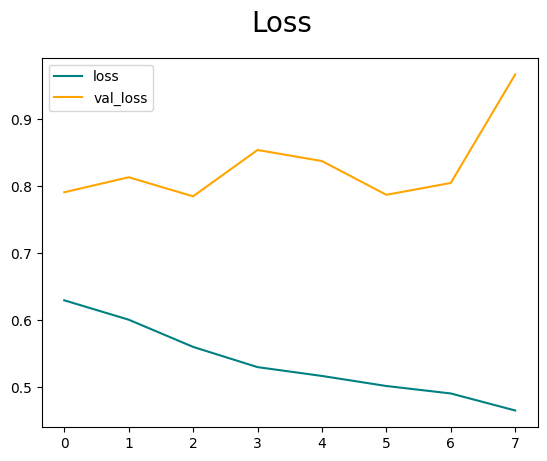

In [43]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

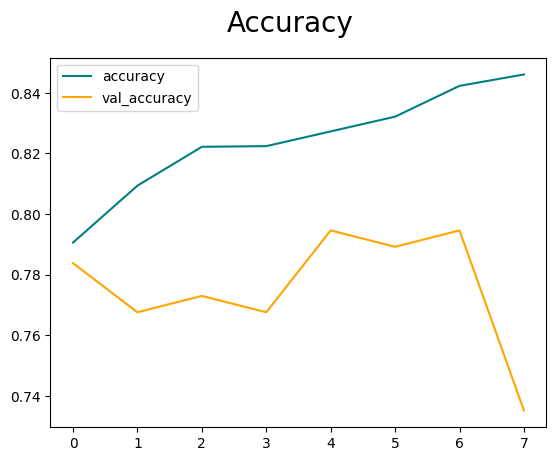

In [44]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Testing the Model on Outside Images

#### Pinevine Swallowtail

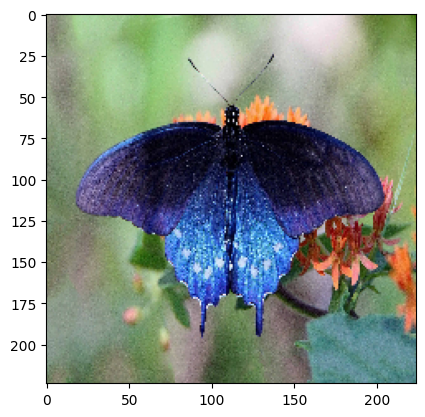

In [45]:
#importing
img = tf.keras.utils.load_img(
    'test_pipevineswallowtail.jpg', target_size=(224, 224)
)
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [46]:
img_array = tf.keras.utils.img_to_array(resize)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(imageLabels.iloc[np.argmax(score), 0], 100 * np.max(score))
)

1/1 [==============================] - 0s 37ms/step
This image most likely belongs to PIPEVINE SWALLOW with a 100.00 percent confidence.


#### Atlas Moth

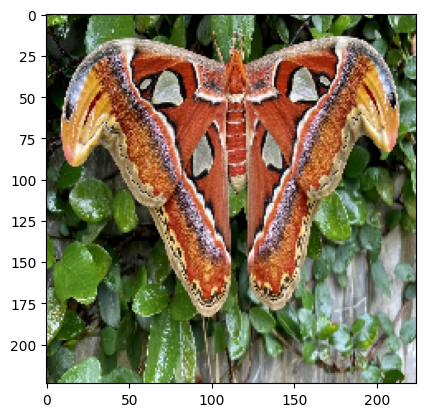

In [36]:
#importing
img = tf.keras.utils.load_img(
    'test_atlasmoth.jpg', target_size=(224, 224)
)
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [37]:
img_array = tf.keras.utils.img_to_array(resize)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(imageLabels.iloc[np.argmax(score), 0], 100 * np.max(score))
)

1/1 [==============================] - 0s 41ms/step
This image most likely belongs to ATLAS MOTH with a 100.00 percent confidence.


#### Red Postman

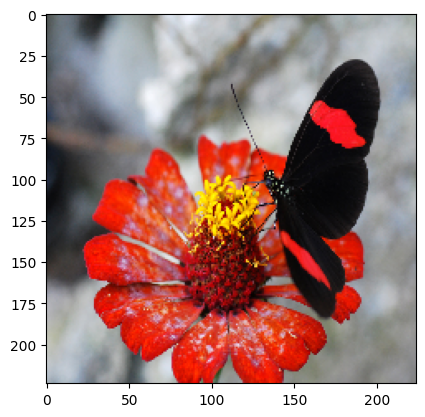

In [47]:
#importing
img = tf.keras.utils.load_img(
    'test_redpostman.jpg', target_size=(224, 224)
)
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [48]:
img_array = tf.keras.utils.img_to_array(resize)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(imageLabels.iloc[np.argmax(score), 0], 100 * np.max(score))
)

1/1 [==============================] - 0s 56ms/step
This image most likely belongs to BANDED ORANGE HELICONIAN with a 100.00 percent confidence.


## Save the Model

In [17]:
from tensorflow.keras.models import load_model

In [41]:
model.save(os.path.join('models','butterflyclassifier5.keras'))

In [28]:
#Testing that it can be reloaded
new_model = load_model('models/butterflyclassifier4.keras')

In [48]:
new_model.save(os.path.join('models','butterflyclassifier_using'))

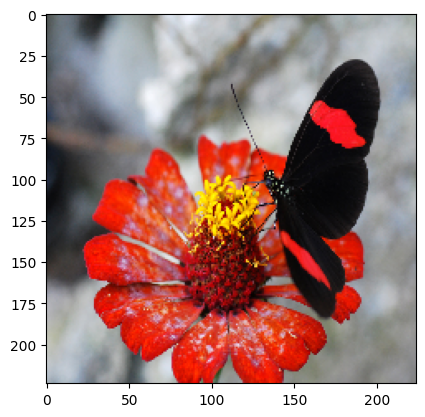

In [29]:
#importing
img = tf.keras.utils.load_img(
    'test_redpostman.jpg', target_size=(224, 224)
)
resize = tf.image.resize(img, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [30]:
img_array = tf.keras.utils.img_to_array(resize)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = new_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(imageLabels.iloc[np.argmax(score), 0], 100 * np.max(score))
)

1/1 [==============================] - 0s 154ms/step
This image most likely belongs to BANDED ORANGE HELICONIAN with a 100.00 percent confidence.


## Test Numbers

In [31]:
new_model.evaluate(test_data)

6/6 [==============================] - 31s 706ms/step - loss: 0.7386 - accuracy: 0.8541


[0.7385711073875427, 0.8540540337562561]

In [33]:
# Getting prediction probabilites
pred_prob = new_model.predict(test_data)
pred_prob


6/6 [==============================] - 3s 410ms/step


array([[ -5.1917    ,  -5.0852184 , -18.503473  , ..., -15.730251  ,
         -1.5092093 ,  -2.2555828 ],
       [ -9.336792  ,  -1.1826272 , -10.141841  , ..., -11.986285  ,
         -4.7882795 ,  -2.4740617 ],
       [ -2.2956665 ,   1.1542499 ,  -5.771648  , ...,   2.5827358 ,
         -3.6672192 ,  -8.817589  ],
       ...,
       [  6.64198   , -16.056843  , -18.60492   , ...,  -2.602145  ,
         -1.6983021 ,  -6.3795204 ],
       [  2.7836823 ,  -6.266793  ,  -8.138297  , ...,  -2.233619  ,
         -2.8750787 ,  -4.2285666 ],
       [ -4.751199  ,   1.9073694 ,   0.40368468, ...,  -4.42617   ,
         -2.6274843 ,  -3.81977   ]], dtype=float32)

In [34]:
y_pred = pred_prob.argmax(axis=1)
y_pred[:50]


array([10, 10, 16, 15,  2, 34, 25, 12, 13,  5, 21, 22, 17, 29, 32, 32,  4,
       34,  7, 16, 10, 14,  2,  3, 34,  6, 27, 30,  9, 15, 10, 35,  5, 23,
        3,  4, 23,  5, 33,  0, 36, 34, 29,  7,  8,  8, 31, 20, 30,  3])

In [54]:
testData_iterator = test_data.as_numpy_iterator()

In [58]:
num_classes = len(imageLabels.index)

#Test batch iterate next
testData_iterator = test_data.as_numpy_iterator()
# test_batch = testData_iterator.next()

label_val = []
for iter in testData_iterator:
  for idx, img in enumerate(test_batch):
      label_val.append(imageLabels.iloc[test_batch[1][idx], 0])

# label_val = []
#   fig, ax = plt.subplots(ncols=8, figsize=(20,20))
#   for idx, img in enumerate(batch[0][:8]):
#       ax[idx].imshow(img.astype(int))
#       select = batch[1][idx]
#       print(select)
#       print(imageLabels.iloc[select, 0])
#       ax[idx].title.set_text(imageLabels.iloc[select, 0])

In [59]:
test_batch = testData_iterator.next()

StopIteration: ignored

In [60]:
y_true = np.array(label_val)
y_true[:50]

array(['WOOD NYMPH', 'RED ADMIRAL', 'WOOD NYMPH', 'RED ADMIRAL',
       'WOOD NYMPH', 'RED ADMIRAL', 'WOOD NYMPH', 'RED ADMIRAL',
       'WOOD NYMPH', 'RED ADMIRAL', 'WOOD NYMPH', 'RED ADMIRAL'],
      dtype='<U11')

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

ValueError: ignored